In [153]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from glob import glob
from skimage.registration import phase_cross_correlation
import imageio # welcome to bmp file land
from astropy.modeling import models # for blackbody function
from astropy import units as u
path = '/Users/chris/Desktop/uf_grad_school/obs_tech/spectroscopy-lab/pepito_star_spectra/'

### Read and process in data

In [205]:
# read, align, median-combine. bars.
def stack_and_median(files): # old
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])       
        images.append(image)
    im_array = np.array(images)
    return np.median(1.0*im_array, axis=0)
    
def stack_shift_median(files): # new
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        # apply shift
        images.append(np.roll(image, [int(shift) for shift in pcc[0]], axis=(0,1)))
    return np.median(np.array(np.stack(images)), axis=0)

In [3]:
ne_lamp = stack_shift_median(path+'ne_lamp_1s*.bmp')
#print(ne_lamp)
#print(ne_lamp.shape)
hg_lamp = stack_shift_median(path+'hg_lamp_1-sixteenth_s.bmp')
kr_lamp = stack_shift_median(path+'kr_lamp_p6.bmp')

In [202]:
# read, align, median-combine. bars.
def stack_and_median(files): # old
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])       
        images.append(image)
    im_array = np.array(images)
    return np.median(1.0*im_array, axis=0)
    
def stack_shift_median(files): # new
    file_names = glob(files)
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        print(pcc[0])
        # apply shift
        images.append(np.roll(image, [int(shift) for shift in pcc[0]], axis=(0,1)))
    #return np.median(np.array(np.stack(images)), axis=0)

stack_shift_median(path+'deneb*.bmp')

"""
#mirach = stack_and_median(path+'aldebaran_3s_*.bmp')
#mirach = stack_and_median(path+'mirach_8s_*.bmp')
mirach1 = stack_median_shift(path+'mirach_8s_*.bmp')
#mirach1 = stack_median_shift(path+'aldebaran_3s_*.bmp')
#mirach1 = stack_median_shift(path+'deneb_3s_13.63g_*.bmp')
print(mirach1.shape)
mirach_rect1 = mirach1[355:539,:]
mirach_collapsed1 = np.median(mirach_rect1, axis=0)
plt.plot(detector_loc, mirach_collapsed1)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')
plt.show()
"""

[0. 0.]
[0. 0.]
[ 86. -86.]


"\n#mirach = stack_and_median(path+'aldebaran_3s_*.bmp')\n#mirach = stack_and_median(path+'mirach_8s_*.bmp')\nmirach1 = stack_median_shift(path+'mirach_8s_*.bmp')\n#mirach1 = stack_median_shift(path+'aldebaran_3s_*.bmp')\n#mirach1 = stack_median_shift(path+'deneb_3s_13.63g_*.bmp')\nprint(mirach1.shape)\nmirach_rect1 = mirach1[355:539,:]\nmirach_collapsed1 = np.median(mirach_rect1, axis=0)\nplt.plot(detector_loc, mirach_collapsed1)\nplt.xlim([1530, 0])\nplt.xlabel('Detector Coordinates (px)')\nplt.ylabel('Flux (ADU)')\nplt.title('Mirach Spectrum')\nplt.show()\n"

(1200, 1600)


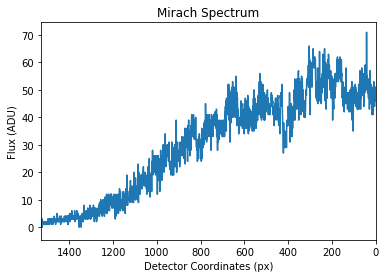

In [172]:
mirach1 = stack_shift_median(path+'mirach_8s_*.bmp')
#mirach1 = stack_median_shift(path+'aldebaran_3s_*.bmp')
#mirach1 = stack_median_shift(path+'deneb_3s_13.63g_*.bmp')
print(mirach1.shape)
mirach_rect1 = mirach1[434:463,:]
mirach_collapsed1 = np.median((mirach_rect1-dark8[434:463,:]), axis=0)
plt.plot(detector_loc, mirach_collapsed1)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')
plt.show()

In [4]:
dark1p16 = stack_shift_median(path+'dark_1d16s_*.bmp')
#print(dark1p16, dark1p16.shape)

dark1p94 = stack_shift_median(path+'dark_1d94s_*.bmp')
#print(dark1p94)

dark1 = stack_shift_median(path+'dark_1s_*.bmp')

dark20p5 = stack_shift_median(path+'dark_20p5s_*.bmp')

dark30 = stack_shift_median(path+'dark_30s_*.bmp')

dark3 = stack_shift_median(path+'dark_3s_*.bmp')

dark8 = stack_shift_median(path+'dark_8s_*.bmp')

darkp6 = stack_shift_median(path+'dark_p6s_*.bmp')

flats = dark30 = stack_shift_median(path+'flat_20p5s_*.bmp')
flats_norm = flats-dark20p5
print(flats)
print(flats_norm)

[[150.  155.5 198.  ... 249.5  69.5  99.5]
 [ 89.5  53.  218.  ... 159.5  83.5  55.5]
 [165.5 255.   79.  ...  46.5  95.5  95. ]
 ...
 [109.   42.   61.  ...  53.   91.   76.5]
 [104.5  62.5  48.  ...  51.5 183.5 210. ]
 [ 89.  137.   54.  ...  43.5 205.5  76.5]]
[[ -1.   -1.5  -7.  ...  -3.5   2.5  -2.5]
 [ -3.5   1.   -3.  ...  -2.5   0.5   3.5]
 [ -4.5   0.    5.  ...   1.5  -1.5   0. ]
 ...
 [ -9.   -2.   -2.  ...   4.    0.   -1.5]
 [ -6.5   3.5   3.  ...  -0.5  -0.5  -1. ]
 [  2.  -11.    6.  ...   0.5   3.5  -1.5]]


In [5]:
# dark subtraction and flat division for lamps
kr_lamp_norm = (kr_lamp - darkp6)
#print(kr_lamp_norm, kr_lamp_norm.shape)
#print(kr_lamp_norm/flats)
kr_lamp_norm = kr_lamp_norm/flats
hg_lamp_norm = (hg_lamp - dark1p16)/flats
ne_lamp_norm = (ne_lamp - dark1)/flats
print(ne_lamp_norm)

[[ 0.05666667  0.04180064  0.03787879 ...  0.          0.12230216
   0.06030151]
 [ 0.08379888  0.17924528  0.02752294 ... -0.00626959  0.10179641
   0.10810811]
 [ 0.00906344  0.00196078  0.10759494 ...  0.20430108  0.06806283
   0.08947368]
 ...
 [ 0.03211009  0.1547619   0.08196721 ...  0.1509434   0.06043956
   0.06535948]
 [ 0.0430622   0.16        0.10416667 ...  0.16504854  0.02724796
   0.00238095]
 [ 0.03932584  0.03284672  0.13888889 ...  0.1954023   0.02919708
   0.07189542]]


### Wavelength calibration

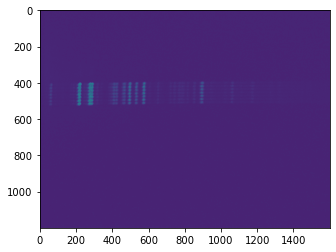

In [152]:
plt.figure()
plt.imshow((ne_lamp_norm))
plt.show()

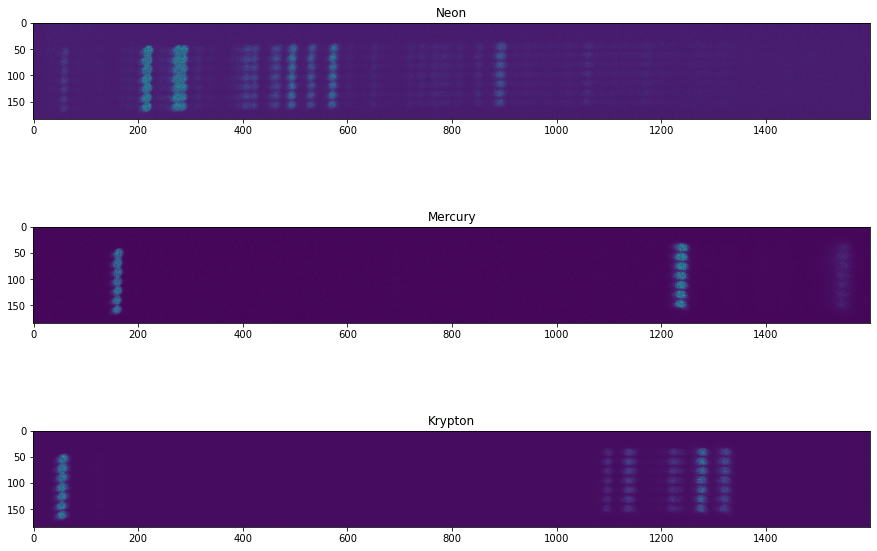

In [7]:
fig, axes = plt.subplots(figsize=(15,10))
#lamps = [ne_lamp_norm, hg_lamp_norm, kr_lamp_norm]
#stars = [mirach_norm, deneb_norm, aldebaran_norm]
plt.subplot(311)
plt.title('Neon')
ne_rect = ne_lamp_norm[355:539,:]
plt.imshow(ne_rect)

plt.subplot(312)
plt.title('Mercury')
hg_rect = hg_lamp_norm[355:539,:]
plt.imshow(hg_rect)

plt.subplot(313)
plt.title('Krypton')
kr_rect = kr_lamp_norm[355:539,:]
plt.imshow(kr_rect)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [48]:
ne_collapsed = np.mean(ne_rect, axis=0)
hg_collapsed = np.mean(hg_rect, axis=0)
kr_collapsed = np.mean(kr_rect, axis=0)
detector_loc = np.arange(len(ne_collapsed))

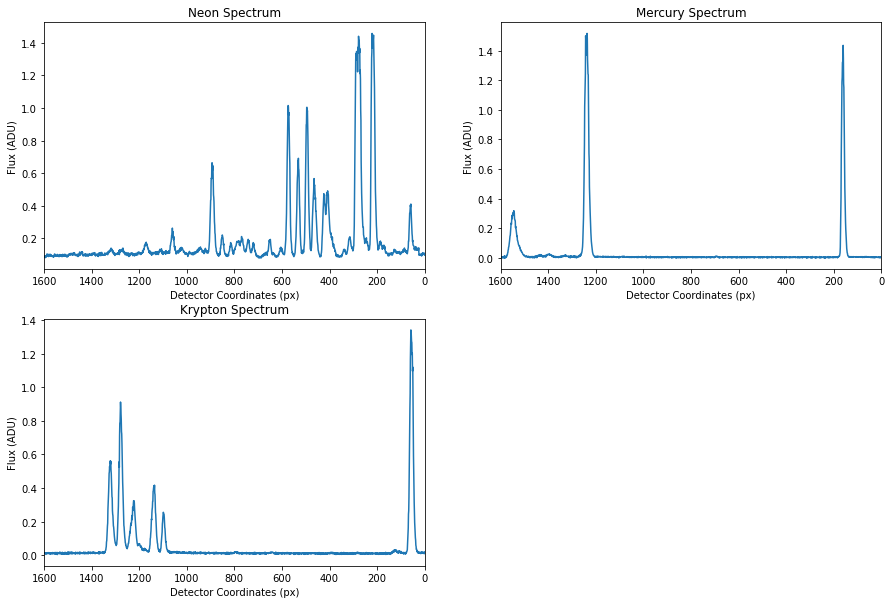

In [51]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(detector_loc, ne_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Neon Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(detector_loc, hg_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mercury Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(detector_loc, kr_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Krypton Spectrum')
plt.show()

In [13]:
def get_line_centroid(x_bounds, detector_px, flux):
    indcs = (detector_px > x_bounds[0]) & (detector_px < x_bounds[1])  # get the indices where we're in between the specified bounds
    x_i, m_i = detector_px[indcs], flux[indcs]  # apply the indices to our detector location and flux arrays
    return sum(x_i * m_i) / sum(m_i)  # return the centroid (flux weighted center-of-mass of the line)


<IPython.core.display.Javascript object>


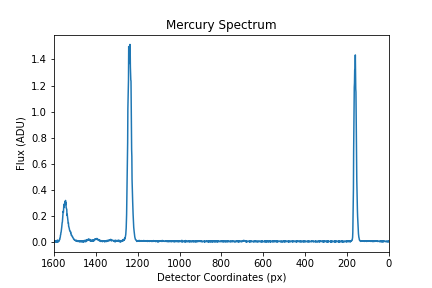

In [58]:
#%matplotlib notebook
plt.figure()
plt.plot(detector_loc, hg_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mercury Spectrum')
plt.show()

This looks familiar! I'll use the lines from the wavelength calibration hw to orient myself

In [59]:
print(f'{get_line_centroid([140,175], detector_loc, ne_collapsed):.2f}') 
print(f'{get_line_centroid([1209, 1264], detector_loc, ne_collapsed):.2f}') 
print(f'{get_line_centroid([1503, 1575], detector_loc, ne_collapsed):.2f}') 


158.81
1236.68
1538.98


In [104]:
# read in lines
"""
lamp,wl_AA,loc_px
Hg,5460.735,158.81
Hg,4358.328,1236.68
Hg,4046.563,1538.98
"""
#line_data = np.genfromtxt(path+'spectroscopy_lines.csv', names=True, delimiter=',', dtype=float) 
#line_data = np.genfromtxt('/Users/chris/Desktop/uf_grad_school/obs_tech/spectroscopy-lab/pepito_lines.csv', names=True, delimiter=',', dtype=float) 
line_data = np.genfromtxt(path+'spec-lab-lines.csv', names=True, delimiter=',', dtype=float) 
wavelengths, locations = line_data['wl_AA'], line_data['loc_px']
argsort = np.argsort(locations)  # sort the wavelengths by their detector locations to prevent issues later on
locations, wavelengths=locations[argsort], wavelengths[argsort]  # apply the sorted indices to the original arrays
print(locations)
print(wavelengths)


[ 158.81 1236.68 1538.98]
[5460.735 4358.328 4046.563]


In [105]:
coeffs = np.polyfit(locations, wavelengths, deg=5)  # determine coefficients for a polynomial of degree 5 to be fit to the data
print(coeffs)  # A*x^5 + B*x^4 + C*x^3 + D*x^2 + E*x + F; very small valued coefficients indicate you're probably over-fitting
polynomial = np.poly1d(coeffs)  # create a poly1d object from our coefficients for np.polyval to use
fitted_wavelengths = np.polyval(polynomial, locations)  # get the wavelength from the fit for the specified detector coordinates


[ 7.29069568e-14  8.30024283e-12 -1.57871409e-07 -4.56289131e-04
 -3.23239519e-01  5.52419624e+03]


/Users/chris/anaconda2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


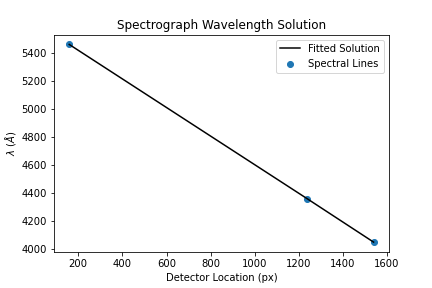

In [106]:
# Plot the fit
plt.figure()
plt.scatter(locations, wavelengths, label='Spectral Lines')
plt.plot(locations, fitted_wavelengths, c='k', label='Fitted Solution')
plt.xlabel('Detector Location (px)')
plt.ylabel(r'$\lambda$ ($\AA$)')
plt.title('Spectrograph Wavelength Solution')
plt.legend()
plt.show()

In [107]:
residuals = fitted_wavelengths - wavelengths
print(np.std(residuals)) # RMS of residuals

7.729218719749019e-13


<IPython.core.display.Javascript object>


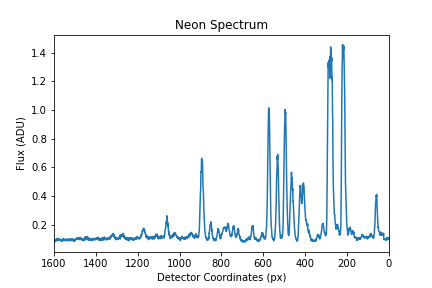

In [74]:
#%matplotlib notebook
plt.figure()
plt.plot(detector_loc, ne_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Neon Spectrum')
plt.show()

In [15]:
print(f'{get_line_centroid([43, 72], detector_loc, ne_collapsed):.2f}') # rightmost line
print(f'{get_line_centroid([196, 231], detector_loc, ne_collapsed):.2f}') # big ol line
print(f'{get_line_centroid([253, 298], detector_loc, ne_collapsed):.2f}') # other big ol line
print(f'{get_line_centroid([403, 417], detector_loc, ne_collapsed):.2f}') # doublet 
print(f'{get_line_centroid([417, 428], detector_loc, ne_collapsed):.2f}') # doublet
print(f'{get_line_centroid([450, 477], detector_loc, ne_collapsed):.2f}')
print(f'{get_line_centroid([480, 508], detector_loc, ne_collapsed):.2f}')
print(f'{get_line_centroid([519, 545], detector_loc, ne_collapsed):.2f}')
print(f'{get_line_centroid([559, 587], detector_loc, ne_collapsed):.2f}')
print(f'{get_line_centroid([878, 905], detector_loc, ne_collapsed):.2f}')
print(f'{get_line_centroid([1045, 1079], detector_loc, ne_collapsed):.2f}')


58.06
216.04
278.68
409.78
422.48
463.30
494.33
531.67
572.89
892.42
1061.67


In [108]:
# For other lines, estimate wavelength for easier identification in NIST
print(np.polyval(polynomial, 58.06)) # n
print(np.polyval(polynomial, 216.04)) # n
print(np.polyval(polynomial, 278.68)) # y 5343.2834? 5400.5618?
print(np.polyval(polynomial, 409.78)) # n
print(np.polyval(polynomial, 422.48)) # n
print(np.polyval(polynomial, 463.30)) # n
print(np.polyval(polynomial, 494.33)) # n
print(np.polyval(polynomial, 531.67)) # n
print(np.polyval(polynomial, 572.89)) # n
print(np.polyval(polynomial, 892.42)) # n
print(np.polyval(polynomial, 1061.67)) # n


5503.860060340279
5431.5275886578975
5395.435071601776
5305.332537422039
5295.53218688462
5262.737333403342
5236.486979226092
5203.3930707861255
5164.969639501085
4806.664062992127
4586.683881256677


This is kinda rough and the middle lines are almost like a totally different line of fit...I only add one more line from neon.  

<IPython.core.display.Javascript object>


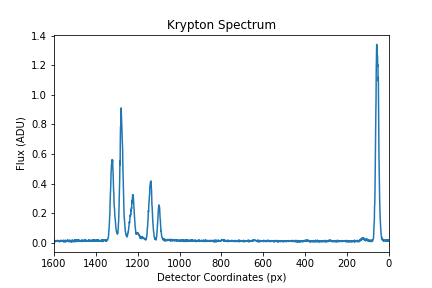

In [91]:
plt.figure()
plt.plot(detector_loc, kr_collapsed)
plt.xlim([1600, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Krypton Spectrum')
plt.show()

In [39]:
print(f'{get_line_centroid([34, 72], detector_loc, ne_collapsed):.2f}') # rightmost line
print(f'{get_line_centroid([1082, 1112], detector_loc, ne_collapsed):.2f}') # big ol line
print(f'{get_line_centroid([1118, 1160], detector_loc, ne_collapsed):.2f}') # other big ol line
print(f'{get_line_centroid([1205, 1249], detector_loc, ne_collapsed):.2f}') # doublet 
print(f'{get_line_centroid([1256, 1297], detector_loc, ne_collapsed):.2f}') # doublet
print(f'{get_line_centroid([1298, 1343], detector_loc, ne_collapsed):.2f}')


55.01
1097.23
1139.09
1227.08
1276.37
1320.46


In [109]:
# For other lines, estimate wavelength for easier identification in NIST
print(np.polyval(polynomial, 55.01)) # n
print(np.polyval(polynomial, 1097.23)) # y 3327.153 or 3329.158, actually no
print(np.polyval(polynomial, 1139.09)) # y 3063.301, actually 4489.88
print(np.polyval(polynomial, 1227.08)) # y 4369.69
print(np.polyval(polynomial, 1276.37)) # n
print(np.polyval(polynomial, 1320.46)) # y? 4250.580

"""
lamp,wl_AA,loc_px
Hg,5460.735,158.81
Hg,4358.328,1236.68
Hg,4046.563,1538.98
Ne,5343.2834,278.68??? # not this one
Ne,5400.5618,278.68??? # this one
Kr,4489.88,1139.09
Kr,1227.08,4369.69
Kr,1320.46,4250.580 # later removed
"""

5505.00788676694
4539.628848093209
4484.407347689397
4370.467929511537
4309.005043815974
4256.21585854743


In [110]:
line_data2 = np.genfromtxt(path+'spec-lab-lines2.csv', names=True, delimiter=',', dtype=float) 
wavelengths2, locations2 = line_data2['wl_AA'], line_data2['loc_px']
argsort2 = np.argsort(locations2)  # sort the wavelengths by their detector locations to prevent issues later on
locations2, wavelengths2=locations2[argsort2], wavelengths2[argsort2]  # apply the sorted indices to the original arrays
print(locations2)
print(wavelengths2)

[ 158.81  278.68 1139.09 1236.68 1538.98 4250.58 4369.69]
[5460.735  5400.5618 4489.88   4358.328  4046.563  1320.46   1227.08  ]


In [111]:
coeffs2 = np.polyfit(locations2, wavelengths2, deg=5)  # determine coefficients for a polynomial of degree 5 to be fit to the data
print(coeffs2)  # A*x^5 + B*x^4 + C*x^3 + D*x^2 + E*x + F; very small valued coefficients indicate you're probably over-fitting
polynomial2 = np.poly1d(coeffs2)  # create a poly1d object from our coefficients for np.polyval to use
fitted_wavelengths2 = np.polyval(polynomial2, locations2)  # get the wavelength from the fit for the specified detector coordinates


[ 2.41440203e-14 -2.78471788e-10  1.12780503e-06 -1.89171018e-03
  1.91918069e-01  5.47265924e+03]


<IPython.core.display.Javascript object>


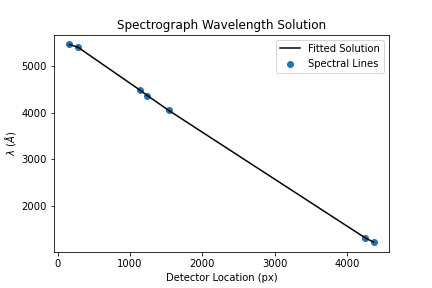

In [112]:
# Plot the fit
plt.figure()
plt.scatter(locations2, wavelengths2, label='Spectral Lines')
plt.plot(locations2, fitted_wavelengths2, c='k', label='Fitted Solution')
plt.xlabel('Detector Location (px)')
plt.ylabel(r'$\lambda$ ($\AA$)')
plt.title('Spectrograph Wavelength Solution')
plt.legend()
plt.show()

In [113]:
residuals2 = fitted_wavelengths2 - wavelengths2
print(np.std(residuals2)) # RMS of residuals

5.147134545695873


Meh. Let's chop off the last line. And I guess the first line too.

In [287]:
line_data2 = np.genfromtxt(path+'spec-lab-lines3.csv', names=True, delimiter=',', dtype=float) 
wavelengths2, locations2 = line_data2['wl_AA'], line_data2['loc_px']
argsort2 = np.argsort(locations2)  # sort the wavelengths by their detector locations to prevent issues later on
locations2, wavelengths2=locations2[argsort2], wavelengths2[argsort2]  # apply the sorted indices to the original arrays
print(locations2)
print(wavelengths2)

[ 158.81  278.68 1139.09 1236.68 1538.98 4250.58]
[5460.735  5400.5618 4489.88   4358.328  4046.563  1320.46  ]


In [288]:
coeffs2 = np.polyfit(locations2, wavelengths2, deg=5)  # determine coefficients for a polynomial of degree 5 to be fit to the data
print(coeffs2)  # A*x^5 + B*x^4 + C*x^3 + D*x^2 + E*x + F; very small valued coefficients indicate you're probably over-fitting
polynomial2 = np.poly1d(coeffs2)  # create a poly1d object from our coefficients for np.polyval to use
fitted_wavelengths2 = np.polyval(polynomial2, locations2)  # get the wavelength from the fit for the specified detector coordinates


[-1.79062096e-13  1.23002295e-09 -2.24329131e-06  9.83521448e-04
 -6.55193135e-01  5.54820192e+03]


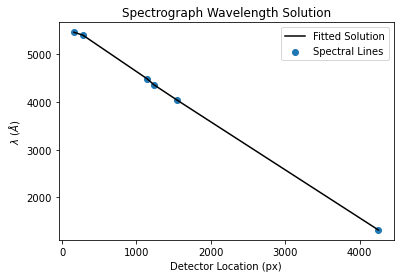

In [289]:
# Plot the fit
plt.figure()
plt.scatter(locations2, wavelengths2, label='Spectral Lines')
plt.plot(locations2, fitted_wavelengths2, c='k', label='Fitted Solution')
plt.xlabel('Detector Location (px)')
plt.ylabel(r'$\lambda$ ($\AA$)')
plt.title('Spectrograph Wavelength Solution')
plt.legend()
plt.show()

In [290]:
residuals2 = fitted_wavelengths2 - wavelengths2
print(np.std(residuals2)) # RMS of residuals

6.108923199100392e-11


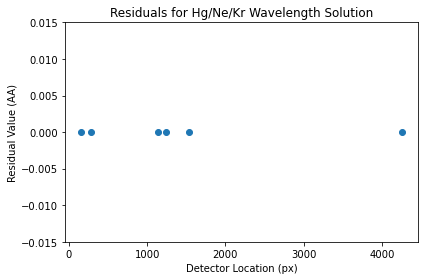

In [293]:
plt.figure()
plt.scatter(locations2, residuals2, label='Residuals')
plt.xlabel('Detector Location (px)')
plt.ylabel('Residual Value (AA)')
plt.title('Residuals for Hg/Ne/Kr Wavelength Solution')
plt.ylim(-0.015, 0.015)
plt.tight_layout()
plt.show()

Wavelength calibration, check.

### Stellar spectra

In [206]:
# read and median combine the stars
mirach = stack_shift_median(path+'mirach_8s_*.bmp')
deneb = stack_shift_median(path+'deneb_3s_13.63g_*.bmp')
aldebaran = stack_shift_median(path+'aldebaran_3s_*.bmp')
mirach1 = stack_shift_median(path+'mirach_8s_1.bmp')
aldebaran1 = stack_shift_median(path+'aldebaran_3s_1.bmp')
deneb1 = stack_shift_median(path+'deneb_3s_13.63g_1.bmp')


In [207]:
# dark subtraction and flat division for stars
mirach_norm = (mirach - dark8)
deneb_norm = (deneb - dark3)
aldebaran_norm = (aldebaran - dark3)
mirach_norm1 = (mirach1 - dark8)
aldebaran_norm1 = (aldebaran1 - dark8)
deneb_norm1 = (deneb1 - dark8)


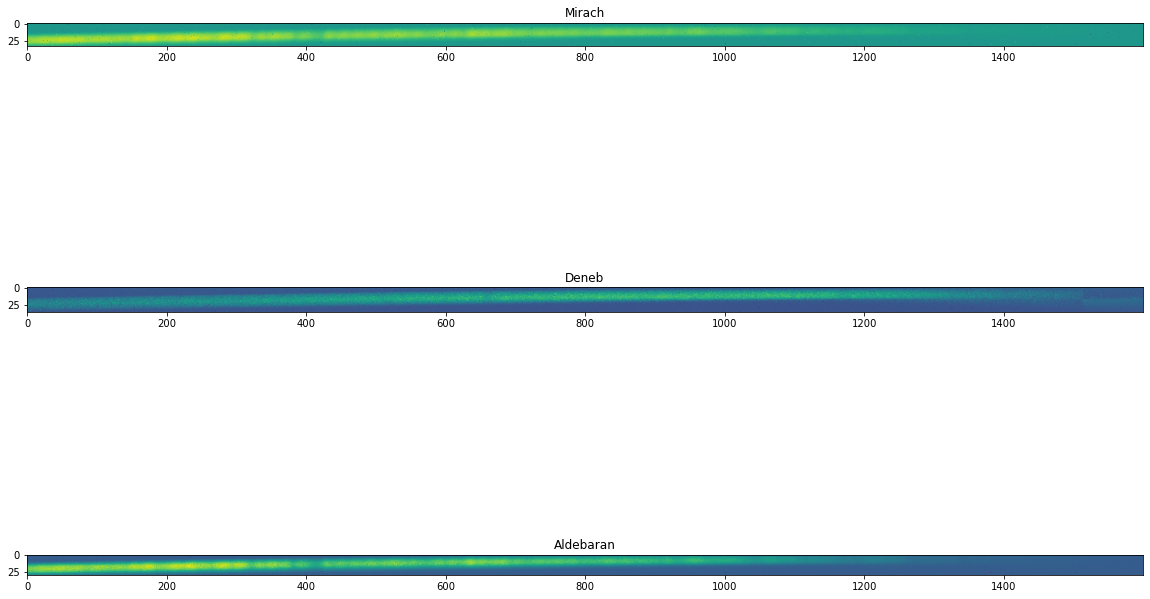

In [208]:
%matplotlib inline
fig, axes = plt.subplots(figsize=(20,13))
#lamps = [ne_lamp_norm, hg_lamp_norm, kr_lamp_norm]
#stars = [mirach_norm, deneb_norm, aldebaran_norm]
plt.subplot(311)
plt.title('Mirach')
mirach_rect = mirach_norm[430:463,:]
plt.imshow(mirach_rect)

plt.subplot(312)
plt.title('Deneb')
deneb_rect = deneb_norm[475:510,:]
plt.imshow(deneb_rect)

plt.subplot(313)
plt.title('Aldebaran')
aldebaran_rect = aldebaran_norm[434:463,:]
plt.imshow(aldebaran_rect)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [209]:
mirach_collapsed = np.mean(mirach_rect, axis=0)
deneb_collapsed = np.mean(deneb_rect, axis=0)
aldebaran_collapsed = np.mean(aldebaran_rect, axis=0)
detector_loc = np.arange(len(ne_collapsed))

mirach_rect1 = mirach_norm1[430:463,:]
mirach_collapsed1 = np.mean(mirach_rect1, axis=0)
aldebaran_rect1 = aldebaran_norm1[434:463,:]
aldebaran_collapsed1 = np.mean(aldebaran_rect1, axis=0)
deneb_rect1 = deneb_norm1[434:463,:]
deneb_collapsed1 = np.mean(deneb_rect1, axis=0)

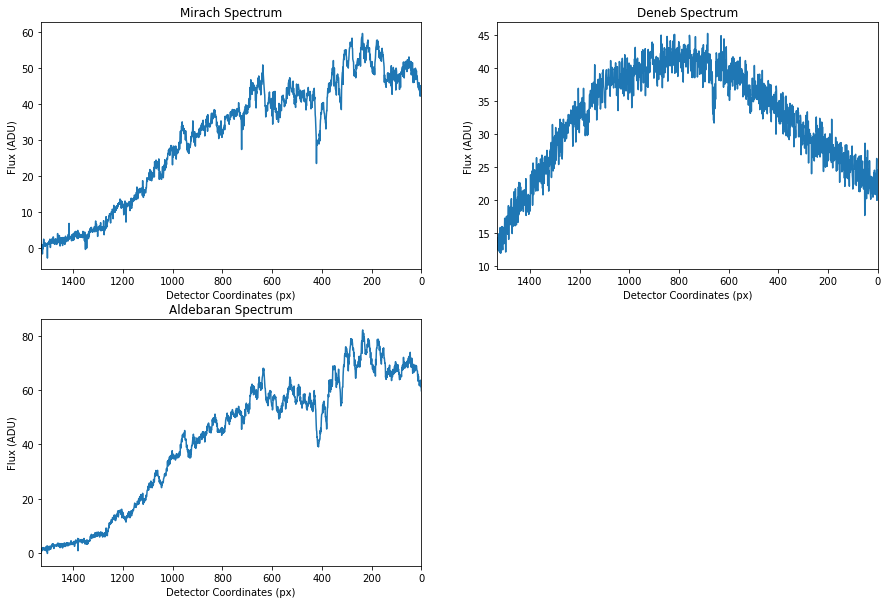

In [210]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(detector_loc, mirach_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(detector_loc, deneb_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Deneb Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(detector_loc, aldebaran_collapsed)
plt.xlim([1530, 0])
plt.xlabel('Detector Coordinates (px)')
plt.ylabel('Flux (ADU)')
plt.title('Aldebaran Spectrum')
plt.show()

#### Produce wavelength-calibrated spectra

In [211]:
print(detector_loc)
wavelengths = np.polyval(polynomial2, detector_loc)
print(wavelengths, len(wavelengths))
print(len(mirach_collapsed))

[   0    1    2 ... 1597 1598 1599]
[5548.20192406 5547.5477122  5546.89545395 ... 4014.03243067 4013.57236557
 4013.11583692] 1600
1600


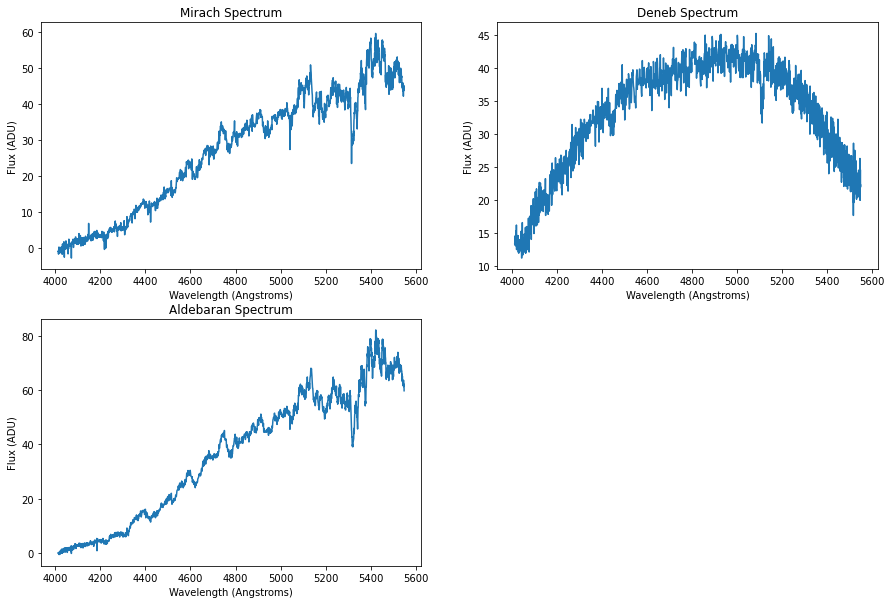

In [217]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(221)
#plt.figure()
plt.plot(wavelengths, mirach_collapsed)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (ADU)')
plt.title('Mirach Spectrum')

plt.subplot(222)
#plt.figure()
plt.plot(wavelengths, deneb_collapsed)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (ADU)')
plt.title('Deneb Spectrum')

plt.subplot(223)
#plt.figure()
plt.plot(wavelengths, aldebaran_collapsed)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (ADU)')
plt.title('Aldebaran Spectrum')

#plt.subplot(224)
#plt.plot(wavelengths, aldebaran_collapsed1)
#plt.xlabel('Wavelength (Angstroms)')
#plt.ylabel('Flux (ADU)')
#plt.title('Aldebaran Spectrum 1')
plt.show()

As an A type star, Deneb is my telluric standard. Its temperature is 8525 +/- 75 K. There's a pretty clear absorption features in its spectrum that we need to interpolate over, so let's fit a Gaussian over it for division from Aldebaran and Mirach spectra.

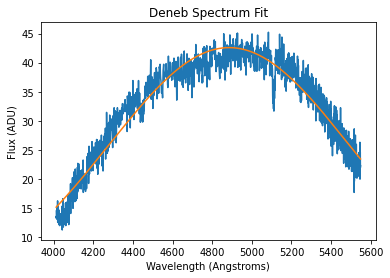

In [223]:
#%matplotlib notebook
#%matplotlib inline
from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=45, mean=4850, stddev=250)
fitted_deneb = fitter(model, wavelengths, deneb_collapsed)
#plt.figure()
plt.plot(wavelengths, deneb_collapsed)
plt.plot(wavelengths, fitted_deneb(wavelengths))
#plt.xlim([1600, 0])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (ADU)')
plt.title('Deneb Spectrum Fit')
plt.show()

#### Divide Aldebaran and Mirach by Telluric Standard and Multiply by Blackbody of 8525 K

[1.16629903e-04 1.16627227e-04 1.16624554e-04 ... 9.30869376e-05
 9.30734043e-05 9.30599705e-05] erg / (cm2 Hz s sr)


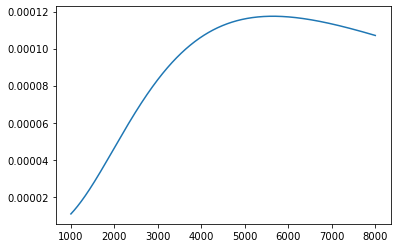

In [269]:
bb = models.BlackBody(temperature=8525*u.K)
print(bb(wavelengths*u.AA))
plt.plot(np.linspace(1000,8000,1600), bb(np.linspace(2000,8000,1600)*u.AA))
plt.show()

[1.16629903e-04 1.16627227e-04 1.16624554e-04 ... 9.30869376e-05
 9.30734043e-05 9.30599705e-05] erg / (cm2 Hz s sr)


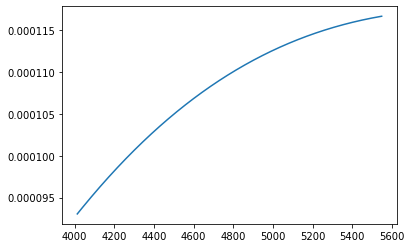

In [262]:
bb = models.BlackBody(temperature=8525*u.K)
print(bb(wavelengths*u.AA))
plt.plot(wavelengths, bb(wavelengths*u.AA))
plt.show()

[1.16452843e-07 1.16450145e-07 1.16447451e-07 ... 9.28765443e-08
 9.28630121e-08 9.28495796e-08]


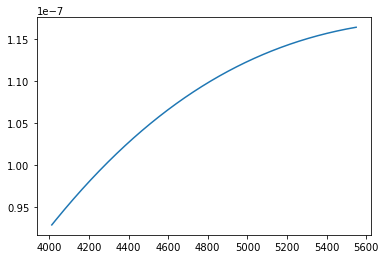

In [274]:
import scipy.constants

bb = models.BlackBody(temperature=8525*u.K) # apparently this model is wrong and some people have it sloping down??

c = 3e8 # m/s
h = scipy.constants.h # Planck's constant
k = scipy.constants.k # Boltzmann constant
def bb_model(temp, wav):
    wav_in_meters = wav/(1e10)
    freq = c/wav_in_meters
    #print(freq)
    return ((2*h*freq**3)/(c**2)) * (1/(np.exp((h*freq)/(k*temp))-1))

print(bb_model(8525, wavelengths))
aldebaran_telluric = (aldebaran_collapsed/fitted_deneb(wavelengths))*bb(wavelengths*u.AA)
mirach_telluric = (mirach_collapsed/fitted_deneb(wavelengths))*bb(wavelengths*u.AA)
#aldebaran_telluric = (aldebaran_collapsed/fitted_deneb(wavelengths))*bb_model(8525, wavelengths)
#mirach_telluric = (mirach_collapsed/fitted_deneb(wavelengths))*bb_model(8525, wavelengths)

plt.plot(wavelengths, bb_model(8525, wavelengths))
plt.show()

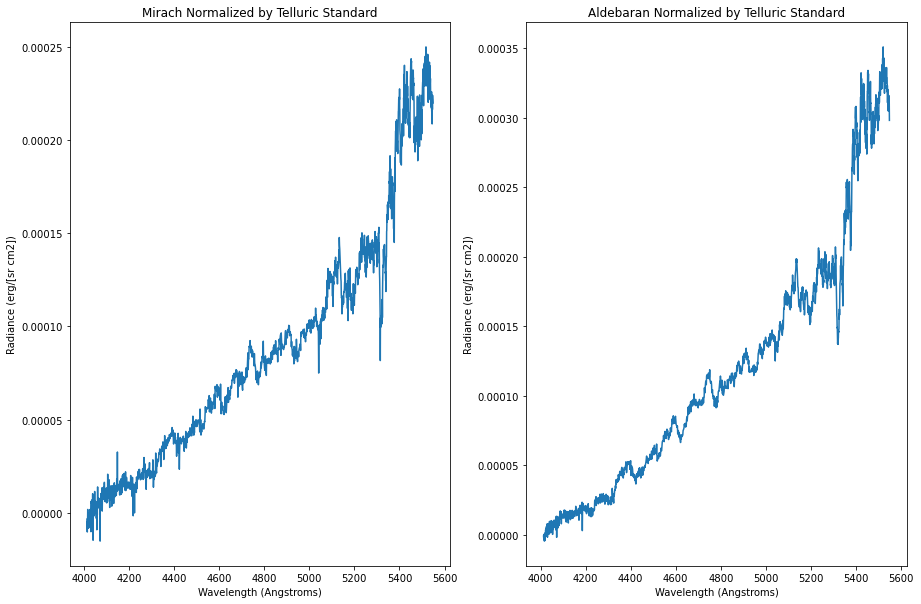

In [271]:
fig, axes = plt.subplots(figsize=(15,10))
plt.subplot(121)
#plt.figure()
plt.plot(wavelengths, mirach_telluric)
#plt.xlim([1530, 0])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Radiance (erg/[sr cm2])')
plt.title('Mirach Normalized by Telluric Standard')

plt.subplot(122)
#plt.figure()
plt.plot(wavelengths, aldebaran_telluric)
#plt.xlim([1530, 0])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Radiance (erg/[sr cm2])')
plt.title('Aldebaran Normalized by Telluric Standard')

plt.show()

Estimate their spectral types by fitting blackbody models over them

[3.01615759e-06 3.01485672e-06 3.01355986e-06 ... 6.26532835e-07
 6.26088311e-07 6.25647392e-07] erg / (cm2 Hz s sr)
[2.72775757e-06 2.72654903e-06 2.72534425e-06 ... 5.45358059e-07
 5.44962468e-07 5.44570092e-07] erg / (cm2 Hz s sr)


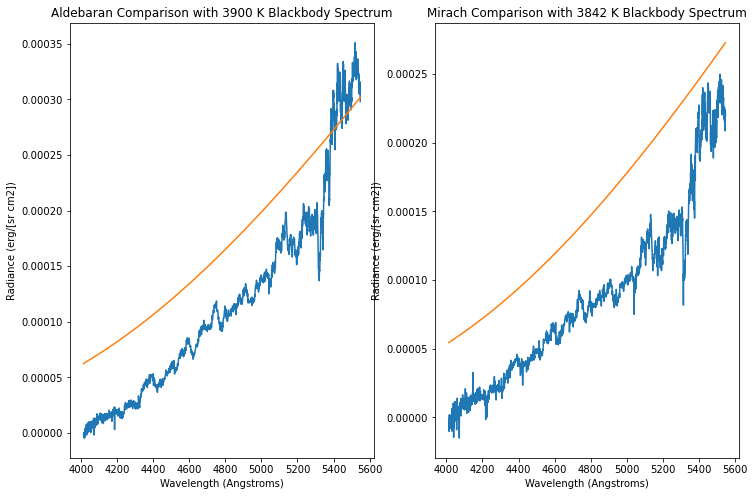

In [312]:
fig, axes = plt.subplots(figsize=(12,8))
plt.subplot(121)
plt.plot(wavelengths, aldebaran_telluric)
bb = models.BlackBody(temperature=3900*u.K)
print(bb(wavelengths*u.AA))
plt.plot(wavelengths, 100*bb(wavelengths*u.AA))
#plt.plot(wavelengths, 10000*bb_model(3910, wavelengths))
#plt.plot(wavelengths, mirach_collapsed/fitted_deneb(wavelengths))
plt.title('Aldebaran Comparison with 3900 K Blackbody Spectrum')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Radiance (erg/[sr cm2])')

plt.subplot(122)
bb = models.BlackBody(temperature=3842*u.K)
print(bb(wavelengths*u.AA))
plt.plot(wavelengths, mirach_telluric)
plt.plot(wavelengths, 100*bb(wavelengths*u.AA))
plt.title('Mirach Comparison with 3842 K Blackbody Spectrum')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Radiance (erg/[sr cm2])')
plt.show()

### Equivalent Widths